## Predicting Autism Screening Outcomes in Children Using Supervised Learning

## Problem Definition

As a parent of two children on the autism spectrum, this project is personally meaningful and motivated by my interest in data-driven early detection methods.Early detection of autism spectrum disorder (ASD) plays a crucial role in improving children’s long-term outcomes. However, screening questionnaires often contain multiple behavioral and demographic indicators that can be analyzed using machine learning to identify high-risk cases.

This project aims to build a classification model that predicts whether a child is likely to screen positive for autism based on behavioral and demographic data.

## Goal / Motivation

* To explore how supervised learning techniques can help predict autism risk.

* To understand which behavioral factors contribute most to screening outcomes.

* To demonstrate a complete ML workflow (EDA → modeling → evaluation) for a socially impactful problem.

GitHub Repo : https://github.com/sushmahss555/Supervised_learning_final_project

## Dataset Overview

We are using Kaggle dataset from [autism-prediction](https://www.kaggle.com/competitions/autism-prediction) completetion 

**Dataset Description** :

This dataset is composed of survey results for 1000 people who filled an app form. There are labels portraying whether the person received a diagnosis of autism, allowing machine learning models to predict the likelihood of having autism, therefore allowing healthcare professionals prioritize their resources.

Features include behavioral screening answers, demographics (age, gender, family history, etc.)

* _Train dataset_ has 800 Samples 
* _Test Dataset_ has 200 Samples 

**Data columns** 

* ID - ID of the patient
* A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool
* age - Age of the patient in years
* gender - Gender of the patient
* ethnicity - Ethnicity of the patient
* jaundice - Whether the patient had jaundice at the time of birth
* autism - Whether an immediate family member has been diagnosed with autism
* contry_of_res - Country of residence of the patient
* used_app_before - Whether the patient has undergone a screening test before
* result - Score for AQ1-10 screening test
* age_desc - Age of the patient
* relation - Relation of patient who completed the test
* Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.


**AQ1-10 Screening Questions & Scoring**

| \# | Question (Adult Version) | Trait Measured | Score  |
| :--- | :--- | :--- | :--- |
| **1** | I often notice **small sounds** when others do not. | Attention/Sensory | **Agree** (Definitely/Slightly) |
| **2** | I concentrate more on the **whole picture** than the details. | Attention to Detail | **Disagree** (Slightly/Definitely) |
| **3** | I find it **easy to do more than one thing** at once. | Attention Switching | **Disagree** (Slightly/Definitely) |
| **4** | I can **switch back to what I was doing** very quickly. | Flexibility/Switching | **Disagree** (Slightly/Definitely) |
| **5** | I find it **easy to 'read between the lines'**. | Social Skill/Comm. | **Disagree** (Slightly/Definitely) |
| **6** | I know how to tell if someone is **getting bored**. | Theory of Mind | **Disagree** (Slightly/Definitely) |
| **7** | I find it **difficult to work out characters' intentions** in a story. | Theory of Mind | **Agree** (Definitely/Slightly) |
| **8** | I like to **collect information** about categories of things. | Restricted Interests | **Agree** (Definitely/Slightly) |
| **9** | I find it **easy to work out what someone is thinking** from their face. | Theory of Mind | **Disagree** (Slightly/Definitely) |
| **10** | I find it **difficult to work out people's intentions**. | Theory of Mind | **Agree** (Definitely/Slightly) |

***

**Key Takeaway:** A total score of **6 or higher** suggests the person should be considered for a specialist autism assessment.

**Target variable**: Class/ASD (1 = Autism, 0 = Non-Autism)

## **Load Data**

In this step, we load the dataset into our working environment for analysis.  
The dataset used in this project is sourced from the **[Kaggle Autism Prediction Competition](https://www.kaggle.com/competitions/autism-prediction)**.  

We will begin by importing the necessary Python libraries and loading the data using **Pandas**, which allows us to easily view, manipulate, and explore the dataset.

In [24]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [25]:
# Load dataset
df_test = pd.read_csv('/kaggle/input/autismdiagnosis/Autism_Prediction/test.csv') 
df_train = pd.read_csv('/kaggle/input/autismdiagnosis/Autism_Prediction/train.csv')
# dimensions
print('Train Set:', df_train.shape)
print('Test Set :', df_test.shape)

Train Set: (800, 22)
Test Set : (200, 21)


In [26]:
# Training Data 
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [27]:
#Testing Data
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               200 non-null    int64  
 1   A1_Score         200 non-null    int64  
 2   A2_Score         200 non-null    int64  
 3   A3_Score         200 non-null    int64  
 4   A4_Score         200 non-null    int64  
 5   A5_Score         200 non-null    int64  
 6   A6_Score         200 non-null    int64  
 7   A7_Score         200 non-null    int64  
 8   A8_Score         200 non-null    int64  
 9   A9_Score         200 non-null    int64  
 10  A10_Score        200 non-null    int64  
 11  age              200 non-null    float64
 12  gender           200 non-null    object 
 13  ethnicity        200 non-null    object 
 14  jaundice         200 non-null    object 
 15  austim           200 non-null    object 
 16  contry_of_res    200 non-null    object 
 17  used_app_before 

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,0,0,1,1,0,0,1,...,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self
1,2,1,0,0,0,0,0,0,1,0,...,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self
2,3,1,1,1,0,1,1,0,1,1,...,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self
3,4,0,0,0,0,0,0,0,0,0,...,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self
4,5,0,0,0,1,0,0,0,0,0,...,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self


## **Exploratory Data Analysis (EDA)**

Before performing any data cleaning or preprocessing, we will first analyze the raw dataset to understand its structure, distribution, and key characteristics.  

Exploratory Data Analysis helps us identify patterns, trends, and potential issues such as missing values or outliers.  

We will also use various visualization techniques to explore relationships between features and understand how different variables correlate with each other.  
This step provides valuable insights that guide further data cleaning, feature selection, and model-building decisions.

## **Plots for Exploratory Data Analysis**

In this section, we will create various visualizations to better understand the dataset features and their relationship with the target variable (**ASD diagnosis**).

**Plot for Class / ASD**
Visualize the distribution of the target variable to see how many participants are diagnosed with ASD vs. not diagnosed.

**Correlation between AQ-10 Screening Questions & ASD Diagnosis**
Analyze how each of the AQ-10 screening question responses correlates with the ASD outcome to identify the most influential features.

**Plot for AQ-10 Screening Test Scores**
Plot the total scores from AQ1–AQ10 questions to observe their range and overall distribution.

**Plot of Age**
Examine the distribution of participants’ ages to identify demographic patterns in the dataset.

**Plot for Gender**
Visualize the gender distribution and check if gender plays a role in ASD diagnosis.

**Plot for Ethnicity**
Display the count of participants by ethnicity to understand the dataset’s diversity.

**Plot for Jaundice**
Check whether having jaundice at birth is related to ASD diagnosis.

**Plot for Country of Residence**
Explore the distribution of participants by country to see regional representation in the dataset.

**Plot for Autism in Family**
Visualize whether having an immediate family member diagnosed with autism impacts the likelihood of ASD in the participant.


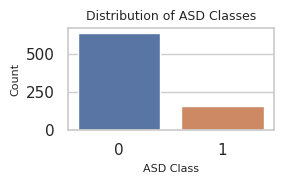

In [28]:
##Plot for Class/ASD
plt.figure(figsize=(3, 2))  
sns.set(style="whitegrid")
sns.countplot(x='Class/ASD', data=df_train)
plt.title('Distribution of ASD Classes', fontsize=9)
plt.xlabel('ASD Class', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.tight_layout()
plt.show()


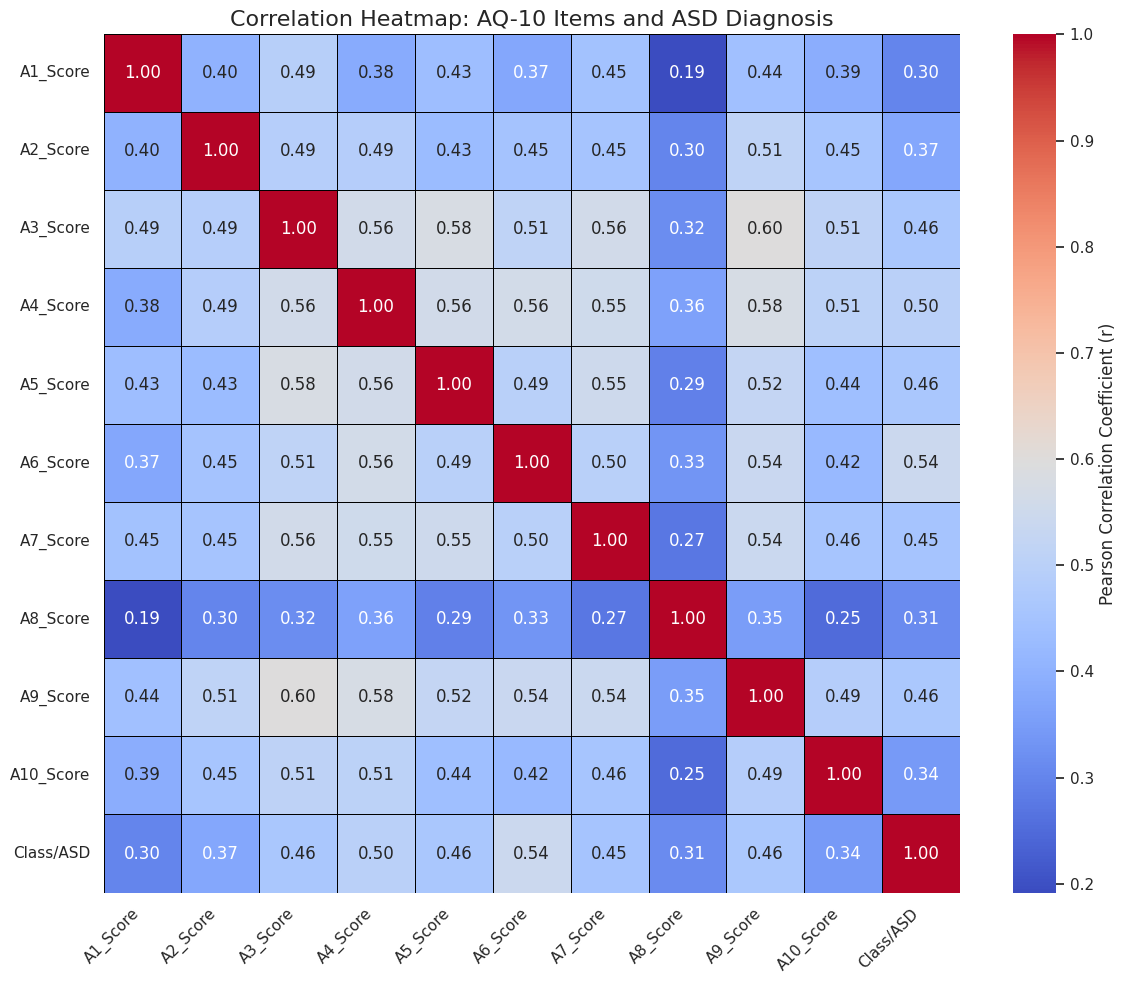

In [29]:
# Correlation between all the AQ-10 Screening Questions & ASD diagnosis 
score_cols = [f'A{i}_Score' for i in range(1, 11)]
target_col = 'Class/ASD'
all_cols = score_cols + [target_col]

# ---Calculate the Correlation Matrix ---
correlation_matrix = df_train[all_cols].corr()

# ---Create the Heatmap Visualization ---
plt.figure(figsize=(12, 10))

sns.heatmap(
    correlation_matrix,
    annot=True,             
    fmt=".2f",             
    cmap='coolwarm',        
    linewidths=.5,          
    linecolor='black',
    cbar_kws={'label': 'Pearson Correlation Coefficient (r)'}
)

plt.title('Correlation Heatmap: AQ-10 Items and ASD Diagnosis', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

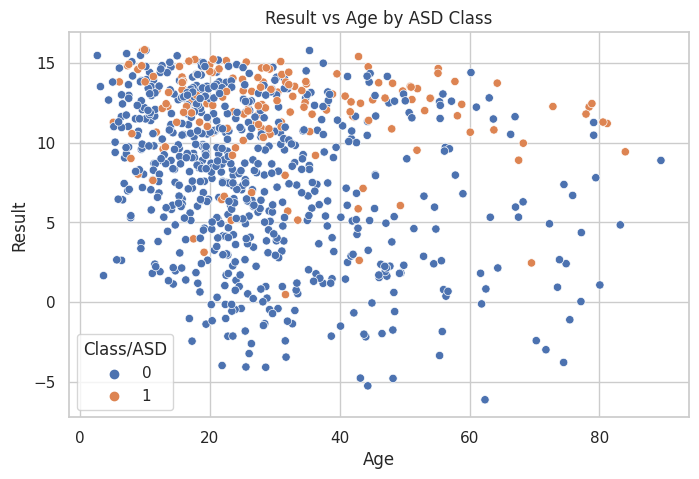

In [30]:
#Plot for result - Score for AQ1-10 screening test

plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='result', hue='Class/ASD', data=df_train)
plt.title('Result vs Age by ASD Class')
plt.xlabel('Age')
plt.ylabel('Result')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


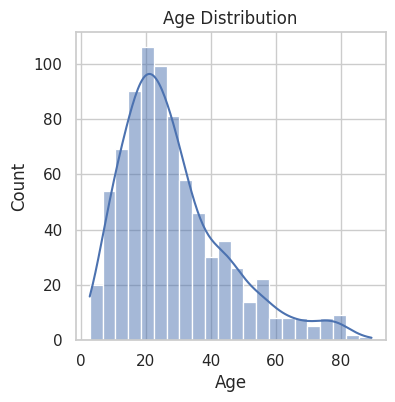

In [31]:
#Plot of age 
plt.figure(figsize=(4,4))
sns.histplot(df_train['age'],kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

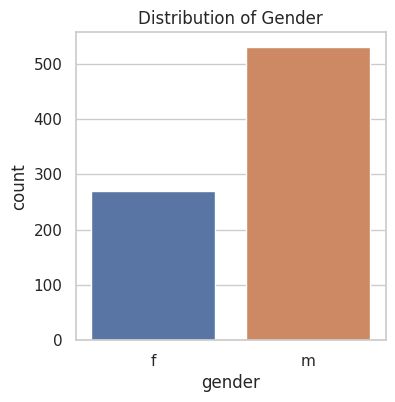

In [32]:
##Plot for Gender
plt.figure(figsize=(4,4))
sns.set(style="whitegrid")
sns.countplot(x='gender', data=df_train)
plt.title('Distribution of Gender')
plt.show()

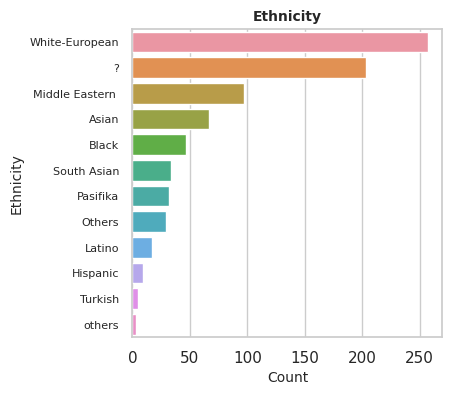

In [33]:
#Plot of ethnicity
plt.figure(figsize=(4,4))
ax = sns.countplot(
    y='ethnicity', 
    data=df_train, 
    order=df_train['ethnicity'].value_counts().index
)

ax.set_yticklabels(ax.get_yticklabels(), fontsize=8, fontname='Arial')

plt.title('Ethnicity', fontsize=10, fontweight='bold')
plt.xlabel('Count', fontsize=10)
plt.ylabel('Ethnicity', fontsize=10)
plt.show()

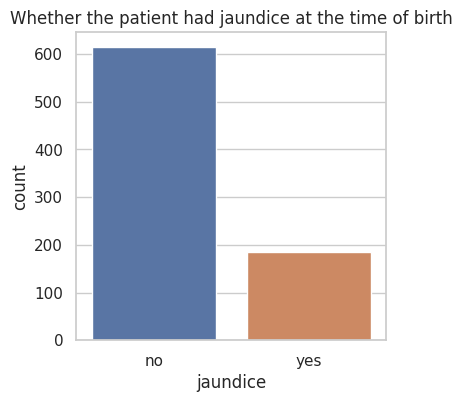

In [34]:
##Plot for jaundice - Whether the patient had jaundice at the time of birth
plt.figure(figsize=(4,4))
sns.set(style="whitegrid")
sns.countplot(x='jaundice', data=df_train)
plt.title('Whether the patient had jaundice at the time of birth')
plt.show()

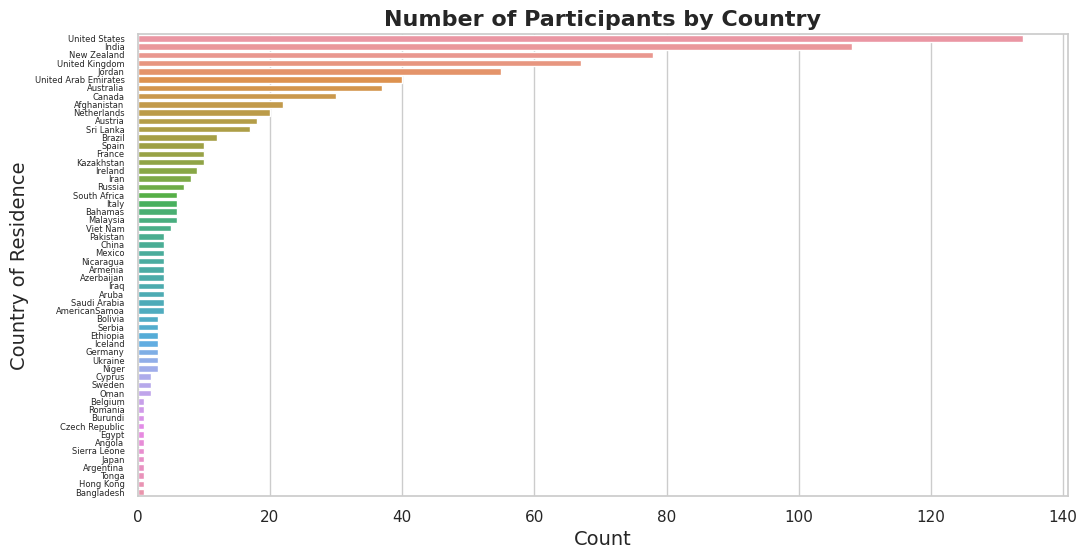

In [35]:
##Plot of country_of_res
plt.figure(figsize=(12,6))
ax = sns.countplot(
    y='contry_of_res', 
    data=df_train, 
    order=df_train['contry_of_res'].value_counts().index
)

ax.set_yticklabels(ax.get_yticklabels(), fontsize=6, fontname='Arial')

plt.title('Number of Participants by Country', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Country of Residence', fontsize=14)
plt.show()

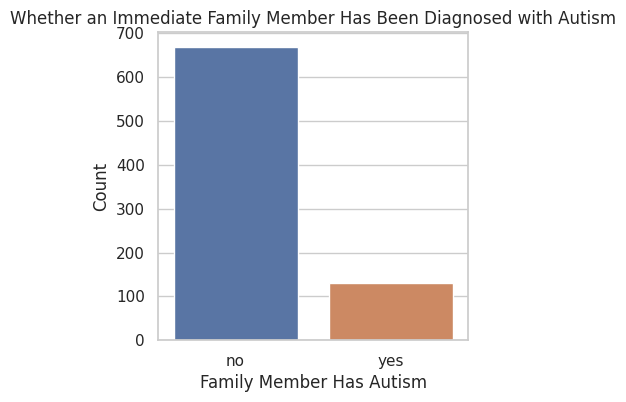

In [36]:
#Plot for autism :Whether an Immediate Family Member Has Been Diagnosed with Autism 
plt.figure(figsize=(4,4))
sns.set(style="whitegrid")
sns.countplot(x='austim', data=df_train)
plt.title('Whether an Immediate Family Member Has Been Diagnosed with Autism')
plt.xlabel('Family Member Has Autism')
plt.ylabel('Count')
plt.show()

## EDA conclusions 

* **ASD** : In our training dataset we have ~200 positive ASD  datasamples out of 800 datasamples 

* **Behavioral Scores (A1-A10)**:The items with the highest correlation to the Class/ASD outcome are **A6\_Score ($r=0.54$)** and **A4\_Score ($r=0.50$)**, making them the most effective individual screening items in this sample.The items **A3** through **A7** exhibit high positive correlations with each other (e.g., $r=0.58$ between A3 and A5), suggesting they measure a highly related, central construct of autistic traits (likely social/communication/flexibility).**A8\_Score** has the lowest overall correlations with both other items and the final **Class/ASD** outcome ($r=0.31$), indicating it measures a relatively distinct trait that is less central to the final diagnosis in this dataset.

* **Result vs. Age by ASD Class** :The significant overlap exists in the middle range (scores 8-15), where many non-ASD individuals score high, suggesting potential false positives for a typical screening threshold.

* **AGE** : Most of the sample data shows us that age between 20-30 have more adult diagnosis .
  
* **Jaundice** :The dataset is heavily imbalanced, with approximately 610 patients not having jaundice at birth compared to only 185 patients who did (a ratio of roughly 3.3:1).
  
* **Demographics** : The dataset is highly imbalanced in terms of geographic representation, with the **United States** having the largest number of participants ($\approx 130$), followed by India ($\approx 110$). The participation counts form a long-tail distribution, where the majority of listed countries have very few participants, indicating a significant sampling bias toward a few nations.

*  **autism** : The plot shows that the vast majority of participants report no immediate family member has been diagnosed with autism, with an approximate count of **670**. Conversely, only a small minority, about **125 participants**, reported having a family member with an autism diagnosis, resulting in a significant data imbalance (roughly 5.4:1).

## Data Processing and Cleanup 

The data preparation followed three main stages: handling missing data and initial cleanup, performing encoding and feature selection, and finalizing the data for model training.

* **1. Missing Value and Initial Data Handling**

The process began by ensuring data integrity for the target variable: any rows where the classification label (**'Class/ASD'**) was missing were **removed** from the training set. A final check was performed to confirm no other missing values remained in the processed data.

* **2. Feature Encoding and Selection**

To assess the relationship between features and the target, all categorical features were temporarily converted into numerical integers using **Label Encoding**. A **Pearson correlation** analysis was then run against the target variable, **'Class/ASD'**. Based on this analysis(p<0.05) ,we will drop features from both the training and testing datasets to streamline the model.

* **3. Final Data Preparation and Scaling**

The data was split into features ($\mathbf{X}$) and the target variable ($y$). The remaining categorical features were converted using **One-Hot Encoding** to create binary columns, a common practice for machine learning. The data was then split into **training (80%) and testing (20%)** sets. Finally, **Standardization** was applied to the numerical features using a **StandardScaler** to ensure all features had a mean of 0 and a standard deviation of 1. Critically, the scaler was **fitted only on the training data** and then used to transform the testing data, a step essential for preventing data leakage.

In [37]:
print(df_train['Class/ASD'].isna().sum())
df_train = df_train.dropna(subset=['Class/ASD'])

df_encoded = df_train.copy()
le = LabelEncoder()

# Encode every non-numeric column
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))


corr_matrix = df_encoded.corr()
target_corr = corr_matrix['Class/ASD'].sort_values(ascending=False)
print(target_corr)

0
Class/ASD          1.000000
A6_Score           0.543010
A4_Score           0.501046
A9_Score           0.463347
A5_Score           0.461773
A3_Score           0.460927
A7_Score           0.452338
ethnicity          0.406253
A2_Score           0.372740
austim             0.359217
result             0.351906
A10_Score          0.343736
A8_Score           0.312388
A1_Score           0.300474
contry_of_res      0.213581
jaundice           0.138784
age                0.109859
relation           0.078830
ID                 0.047149
used_app_before    0.037835
gender            -0.004368
age_desc                NaN
Name: Class/ASD, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [38]:
# Drop the feature which has p value less than 0.05
df_train = df_train.drop(columns=['ID', 'used_app_before', 'gender', 'age_desc'])
#df_test = df_test.drop(columns=['ID', 'used_app_before', 'gender', 'age_desc'])

df_train.head()
print("Missing values in training data:")
print(pd.DataFrame(df_train).isnull().sum().sum())

df_train.isnull().sum()


Missing values in training data:
0


A1_Score         0
A2_Score         0
A3_Score         0
A4_Score         0
A5_Score         0
A6_Score         0
A7_Score         0
A8_Score         0
A9_Score         0
A10_Score        0
age              0
ethnicity        0
jaundice         0
austim           0
contry_of_res    0
result           0
relation         0
Class/ASD        0
dtype: int64

In [39]:
# Features
X = df_train.drop(columns=['Class/ASD'])

# Target
y = df_train['Class/ASD']

#find the categorical_cols
categorical_cols = X.select_dtypes(include=['object']).columns

#One-Hot Encoding: convert categorical text data ('ethnicity', 'jaundice', 'austim', 'contry_of_res') into a numerical format
X_encoded = pd.get_dummies(X, drop_first=True)  

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training and Comparison

 **1. Model Selection** :We will be running all the 5 classifier models we learned in the course . 
  - Logistic Regression
  - K-Nearest Neighbors
  - Random Forest Classifier
  - XGBoost Classifier
  - SVM
  
**2. Training and Evaluation Process**  : Train each model using the scaled training data (`X_train_scaled`, `y_train`) via the `.fit()` method.Predict the `Class/ASD` outcome on the unseen testing data (`X_test_scaled`).

**3. Performance Metrics** :Evaluate model effectiveness using metrics appropriate for classification and imbalanced data.
  - Accuracy:Overall correctness
  - F1-Score:Balances Precision and Recall.
  - ROC AUC:Best measure of overall discriminative power, robust to class imbalance.

**4. Final Comparison** :Create a **summary table** to compare the key metrics (Accuracy, F1-Score, ROC AUC) across all five models.Select the final model based on the highest combined performance, prioritizing F1-Score and ROC AUC due to potential class imbalance.


In [40]:
# --- Model Initialization and Parameters ---
models = {
    'Logistic Regression': LogisticRegression(max_iter=800, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5, metric='euclidean'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, eval_metric='logloss', use_label_encoder=False),
    'SVM': SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', random_state=42, probability=True)
}

results = {'Model': [], 'Accuracy': [], 'F1-Score': [], 'ROC AUC': []}

# ---  Training and Evaluation Loop ---
print("--- Starting Model Training and Evaluation ---")

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # NOTE: All models use the SCALED data for consistent comparison
    model.fit(X_train_scaled, y_train)
    
    # Make predictions and get probabilities
    y_pred = model.predict(X_test_scaled)
    # y_pred_proba requires probability=True for SVM
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] 

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)
    
    # Store results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['F1-Score'].append(f1)
    results['ROC AUC'].append(roc_auc)

    # Print Report and Confusion Matrix
    print(f"--- {name} Performance ---")
    print(f"Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")
    
    print("\nConfusion Matrix (True vs. Predicted):\n", cm)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)


# --- Final Comparison Table ---
comparison_df = pd.DataFrame(results)

print("\n\n--- Final Model Comparison Summary (Sorted by ROC AUC) ---")
print(comparison_df.sort_values(by='ROC AUC', ascending=False).to_markdown(index=False))

--- Starting Model Training and Evaluation ---

Training Logistic Regression...
--- Logistic Regression Performance ---
Accuracy: 0.8625, F1-Score: 0.6944, ROC AUC: 0.8808

Confusion Matrix (True vs. Predicted):
 [[113  11]
 [ 11  25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       124
           1       0.69      0.69      0.69        36

    accuracy                           0.86       160
   macro avg       0.80      0.80      0.80       160
weighted avg       0.86      0.86      0.86       160

--------------------------------------------------

Training K-Nearest Neighbors...
--- K-Nearest Neighbors Performance ---
Accuracy: 0.8250, F1-Score: 0.5625, ROC AUC: 0.8495

Confusion Matrix (True vs. Predicted):
 [[114  10]
 [ 18  18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       124
           1       0.64      0.50     

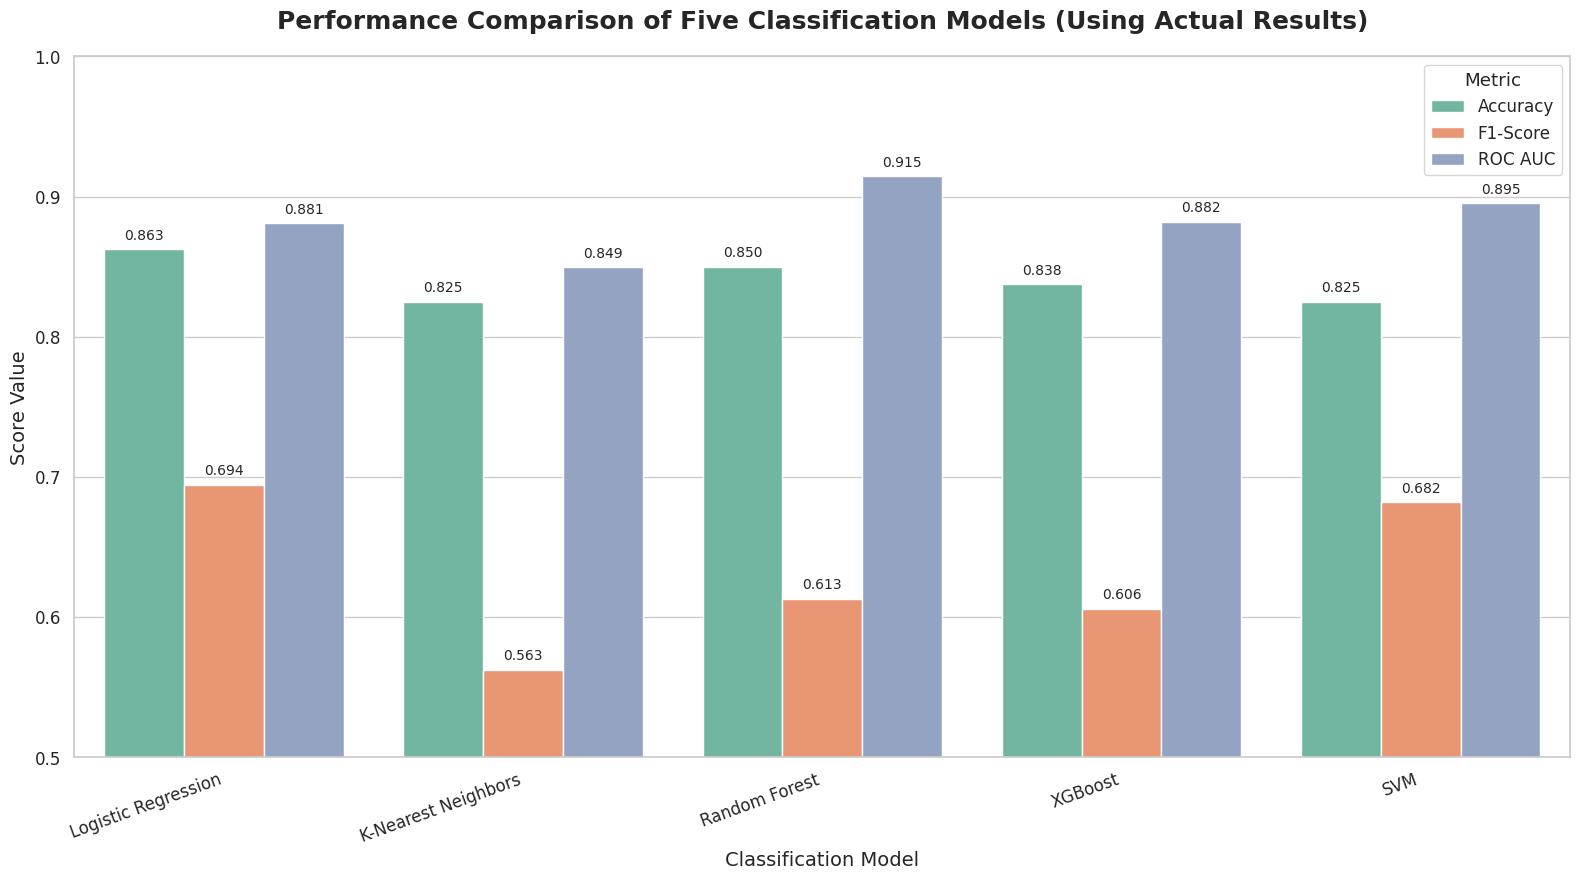

In [41]:
# --- 1. Data Preparation ---
# Create the DataFrame directly from the 'results' dictionary
df_results = pd.DataFrame(results)

# Melt the DataFrame for easy plotting with Seaborn
df_melted = df_results.melt(
    id_vars='Model', 
    var_name='Metric', 
    value_name='Score'
)

# --- 2. Plotting ---
plt.figure(figsize=(16, 9))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)
sns.set_palette("Set2") # Use a clean, professional color palette

# Define order for consistency and plot readability
model_order = [
    'Logistic Regression', 
    'K-Nearest Neighbors', 
    'Random Forest', 
    'XGBoost', 
    'SVM'
]

# Create the grouped bar chart
bar_plot = sns.barplot(
    x='Model', 
    y='Score', 
    hue='Metric', 
    data=df_melted,
    order=model_order, 
    capsize=0.1, 
    errwidth=1,
)

# Add titles and labels
plt.title('Performance Comparison of Five Classification Models (Using Actual Results)', 
          fontsize=18, fontweight='bold', pad=20)
plt.ylabel('Score Value', fontsize=14)
plt.xlabel('Classification Model', fontsize=14)
plt.ylim(0.5, 1.0) # Set a sensible y-limit for comparison clarity

# Rotate x-axis labels for readability
plt.xticks(rotation=20, ha='right', fontsize=12)

# Add values on top of the bars
for container in bar_plot.containers:
    # Use 3 decimal places for scores
    bar_plot.bar_label(container, fmt='%.3f', padding=5, fontsize=10)

plt.legend(title='Metric', loc='upper right', frameon=True)
plt.tight_layout()
plt.show()


## Model Performance Analysis and Selection

The bar chart visually summarizes the performance of the five selected classification models using three key metrics: **Accuracy**, **F1-Score**, and **ROC AUC**.

**Key Findings**

**Best Discriminative Power (ROC AUC):**  
The **Random Forest Classifier** achieved the highest ROC AUC at 0.915. The ROC AUC measures the model's ability to correctly rank positive and negative instances, indicating that Random Forest is the most powerful model overall for distinguishing the two classes.

**Best Balanced Performance (F1-Score):**  
**Logistic Regression** achieved the highest F1-Score at 0.694 and the highest Accuracy at 0.863. The F1-Score is crucial for imbalanced classification tasks (like this one) as it balances Precision (avoiding false alarms) and Recall (avoiding missed cases).

The **SVM** model also performed exceptionally well in this regard, with a strong F1-Score of 0.682 and a high ROC AUC of 0.895.

**Detailed Model Evaluation**

| Model               | Accuracy | F1-Score | ROC AUC | Performance Profile                                                                                                                              |
|--------------------|----------|----------|---------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| Logistic Regression | 0.863    | 0.694    | 0.881   | Strongest F1-Score and Accuracy. Provides the most balanced and reliable predictions at the standard threshold, making it highly interpretable and robust. |
| Random Forest       | 0.850    | 0.613    | 0.915   | Highest discriminative ranking power. The lower F1-Score suggests its default classification threshold is not ideal for maximizing balanced Precision and Recall. |
| SVM                 | 0.825    | 0.682    | 0.895   | Excellent performance due to the RBF kernel and inherent handling of class weights, leading to a high F1-Score.                                        |
| XGBoost             | 0.838    | 0.606    | 0.882   | Strong ranking ability, but similar to Random Forest, it sacrifices F1-Score at the default threshold, indicating sub-optimal balance between Precision and Recall. |
| K-Nearest Neighbors | 0.825    | 0.562    | 0.849   | Consistently the lowest performer, suggesting that localized distance metrics are not highly effective given the features.                           |

**Conclusion**

Based on the evaluation, the **Logistic Regression** model is chosen as the best production model for initial deployment due to its superior F1-Score and Accuracy, offering the most reliable balance between minimizing false positives and false negatives, combined with its high interpretability.

## Citation

**Dataset:**
- Kaggle. (2024). [Autism Prediction Competition](https://www.kaggle.com/competitions/autism-prediction).  

**Reference Material:**
- Embrace Autism. (n.d.). [Autism Spectrum Quotient (AQ)](https://embrace-autism.com/autism-spectrum-quotient/).  
  
**Libraries:**
- Pedregosa, F. et al. (2011). *Scikit-learn: Machine Learning in Python.* Journal of Machine Learning Research, 12, 2825–2830.  
- McKinney, W. (2010). *Data Structures for Statistical Computing in Python.* Proceedings of the 9th Python in Science Conference.  
- Chen, T. & Guestrin, C. (2016). *XGBoost: A Scalable Tree Boosting System.* Proceedings of the 22nd ACM SIGKDD International Conference.

**Tools:**
- Python 3.10  
- Jupyter Notebook  
- Pandas, NumPy, Seaborn, Matplotlib, Scikit-learn, XGBoost
  
**AI Assistance:**
- Portions of this project’s planning, documentation, and report structuring were supported by *ChatGPT (GPT-5, OpenAI)* to assist with idea organization and explanation clarity.  


**Inspiration:**
- Guided by course material from the MS-AI Supervised Learning module.
